# What is a Cost Function? — Gradient Descent — Examples with Python
Robert R.F. DeFilippi

First off, you might have seen cost functions referred to by different names: loss function, or error function, or scoring function.

Any of those names will do, and in this article, we'll stick to cost function.

It is a function we can use to evaluate how well our algorithm maps the target estimate, or how well our algorithm performs optimization problems.

Consider linear regression, where we choose mean squared error (MSE) as our cost function. Our goal is to find a way to minimize the MSE.

Or consider a maximum log-likelihood function. Our goal is also to maximize this function.

Our final goal, however, is to use a cost function so we can learn something from our data.

## Cost Functions and Gradient Descent

Below, we’re going to be implementing gradient descent to create a learning process with feedback. Each time — each step really — we receive some new information, we’re going to make some updates to our estimated parameter which move towards an optimal combination of parameters. We get these estimates using our cost function from before.

Hence, our algorithm is learning through each step because it now knows something it did not in the previous step.

Let’s take this equation below. We want to find the minimum of this function which is quite easy to do. Simply take the first order equation wrt x, set it to zero, and compute the value. In fact, our cost function here is simply our first order equation. Nothing too special but we’re going to be building off this or the rest of the article.

### Finding the minimum of the function

$y = x^2 - 4x + 2$

$\frac{dy}{dx} = 0 = 2x - 4$ (This is our cost function)

$x = 2$

In [4]:
from sympy import *
x = Symbol('x')
y = x**2 -4*x + 2
y

x**2 - 4*x + 2

In [5]:
yprime = y.diff(x)
yprime

2*x - 4

In [7]:
#f = lambdify(x, yprime, 'numpy')
#f(np.ones(5))

How would we find the solution using gradient descent?

Let’s break this down mathematically, as we're going to be estimating a parameter $\theta$ which we will substitute for $x$. $\theta$ is the value we're going to update after every step and will tell us what the current value of $x$ is through minimization process. As $\theta$ converges to the minimum using our cost function.

However, we don't always know were to start $\theta$ on our cost function so we take a guess. It starts at this guessed point somewhere along the cost function, and descends towards the actual value.

That is the descent, in gradient descent.

We are also going to introduce a variable called $\alpha$ which is out learning rate.

The learning rate tells our cost function how fast to move toward its goal of minimization, and control steps size taken by each iteration. At every step of the descent, $\theta_{i}$ is updated based on the values provided in the cost function. If $\alpha$ is too big, the model may miss the minimum. If it too small, could never get to the minimum.

This is important, as tweaking $\alpha$ is just part of applying gradient descent to your problems. It might now work with the first $\alpha$ you chose, and that's ok. Just start tweaking it, and when you see the values starting to converge you know you're on the right path.

$y = x^2 -4x + 2$ 

$\frac{dy}{dx} = 2x - 4$ 

$\alpha$ = learning rate 

$\theta$ = parameter to estimate 

$\theta_{i} := \theta_{i-1} - \alpha \frac{dy}{d\theta_{i-1}}$

Let’s see how we would code this.

In [92]:
def func_y(x):
    return x**2 - 4*x + 2

def gradient_descent(previous_x, learning_rate, epoch):
    
    # To fill with values
    x_gd = []
    y_gd = []
    
    x_gd.append(previous_x)
    y_gd.append(func_y(previous_x))

    # begin the loops to update x and y with out cost function
    for i in range(epoch):
        current_x = previous_x - learning_rate * (2*previous_x - 4)
        x_gd.append(current_x)
        y_gd.append(func_y(current_x))

        # update previous_x
        previous_x = current_x

    return x_gd, y_gd

# Initialize x0 and learning rate
x0 = 4 # Our first 'guess' at what theta could be
learning_rate = 0.15 # Alpha
epoch = 10 # Number of tries

In [93]:
gd = gradient_descent(x0,learning_rate, epoch)
gd

([4,
  3.4,
  2.98,
  2.686,
  2.4802,
  2.33614,
  2.235298,
  2.1647086,
  2.11529602,
  2.0807072140000002,
  2.0564950498],
 [2,
  -0.040000000000000924,
  -1.0396,
  -1.5294040000000004,
  -1.7694079599999997,
  -1.8870099003999998,
  -1.9446348511959997,
  -1.9728710770860403,
  -1.9867068277721591,
  -1.9934863456083578,
  -1.9968083093480953])

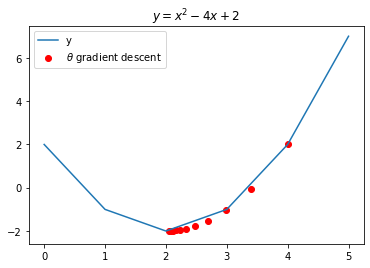

In [94]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(func_y(np.arange(6)), label='y')
plt.scatter(gd[0],gd[1], color='red', label=r'$\theta$ gradient descent')
plt.title('$y = x^2 - 4x + 2$')
plt.legend()

The use of gradient descent here seems trivial, as our function is well behaved. However with more complex functions - such as the one shown below - finding the minimum would be difficult which is why we use this method.

We're not going to go over the more advanced applications of gradient descent in this article, but you should be aware of how to start thinking about this complex problems.

## Estimating Two Parameters

What if we wanted to do the same process as above except we wanted to find two parameters instead of one.

Let's take the function shown below as an example and see if we can find the minimum using gradient descent.

We would go through the same process as before by creating a cost function for each parameter we're estimating - here it is $x$ and $y$ - set our value for $\alpha$, and run our gradient descent algorithm. However this time, $\theta_{0}$ and $\theta_{1}$ will be updated simultaneously as the gradient descends rather than a single value of $\theta$.

$z = 4x^2 + 2y^2 - 2xy$

$\frac{dz}{dx} = 8x - 2y$

$\frac{dz}{dy} = 4y - 2x$

$\theta_{i} := \theta_{i-1} - \alpha \frac{dz}{d\theta_{i-1}}$

We know the true minimum of the function is $(0, 0)$ so our results will be easy to verify.

In [160]:
def func_z(x,y):
    return 4*x**2 + 2*y**2 - 2*x*y

def dx(x,y):
    return 8*x - 2*y

def dy(x,y):
    return 4*y - 2*x

def gradient_descent_2():
    # Create gradient arrays
    grad_x = [] 
    grad_y = []
    grad_z = []

    # Our initinal guess
    theta_0 = 25
    theta_1 = 35

    alpha = 0.05
    epoch = 10000

    grad_x.append(theta_0)
    grad_y.append(theta_1)
#    grad_z.append(f(theta_0,theta_1))

    # Run the gradient
    for i in range(epoch):
        current_theta_0 = theta_0 - alpha * dx(theta_0,theta_1)
        current_theta_1 = theta_1 - alpha * dy(theta_0,theta_1)
        grad_x.append(current_theta_0)
        grad_y.append(current_theta_1)
#        grad_z.append(f(current_theta_0,current_theta_1))

        # Update
        theta_0 = current_theta_0
        theta_1 = current_theta_1
    
    # Return last values
    return theta_0, theta_1, grad_x, grad_y

In [166]:
gd2 = gradient_descent_2()

Our results are essentially $(0,0)$ so looks like our algorithm worked. Perfect.

And, the same as last time let's plot our results to see how our gradient descent performed. And, it's right on the mark. We can see our initial guess of $(25,35)$ was nowhere close, but as we went through each step we became closer and closer to the correct value.

Text(0.5, 0.92, '$z = 4x^2 + 2y^2 - 2xy$')

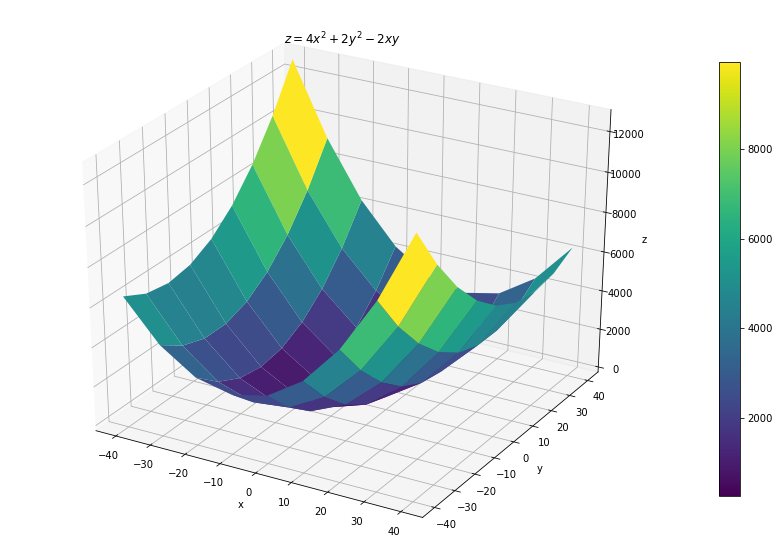

In [152]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

xvals = np.arange(-40,50,10)
yvals = np.arange(-40,50,10)
zvals = func_z(xvals,yvals)

X, Y = np.meshgrid(xvals, yvals)
Z = func_z(X, Y)

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

#ax.plot_wireframe(X, Y, Z, cmap=cm.RdBu, rstride=1, cstride=1)

surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

fig.colorbar(surf, shrink=0.8)
plt.title('$z = 4x^2 + 2y^2 - 2xy$')

Text(0.5, 0.92, '$z = 4x^2 + 2y^2 - 2xy$')

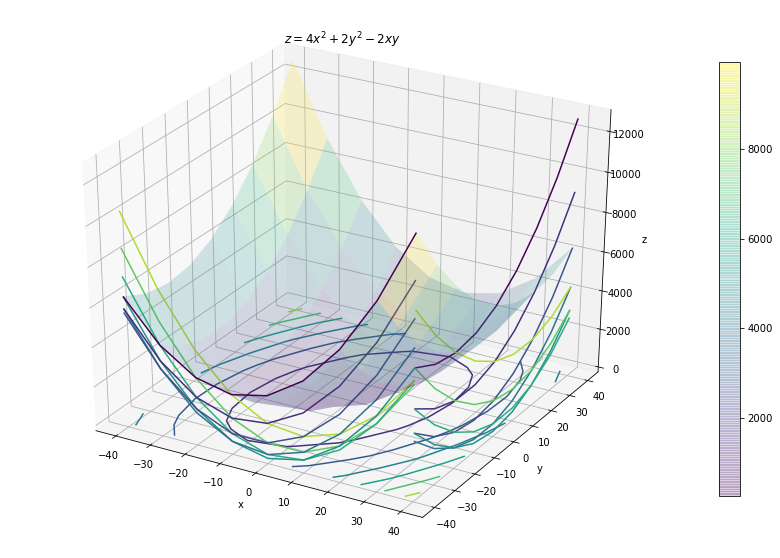

In [153]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2, cmap=cm.viridis)

ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.viridis)
ax.contour(X, Y, Z, zdir='x', offset=40, cmap=cm.viridis)
ax.contour(X, Y, Z, zdir='y', offset=-40, cmap=cm.viridis)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

fig.colorbar(surf, shrink=0.8)
plt.title('$z = 4x^2 + 2y^2 - 2xy$')

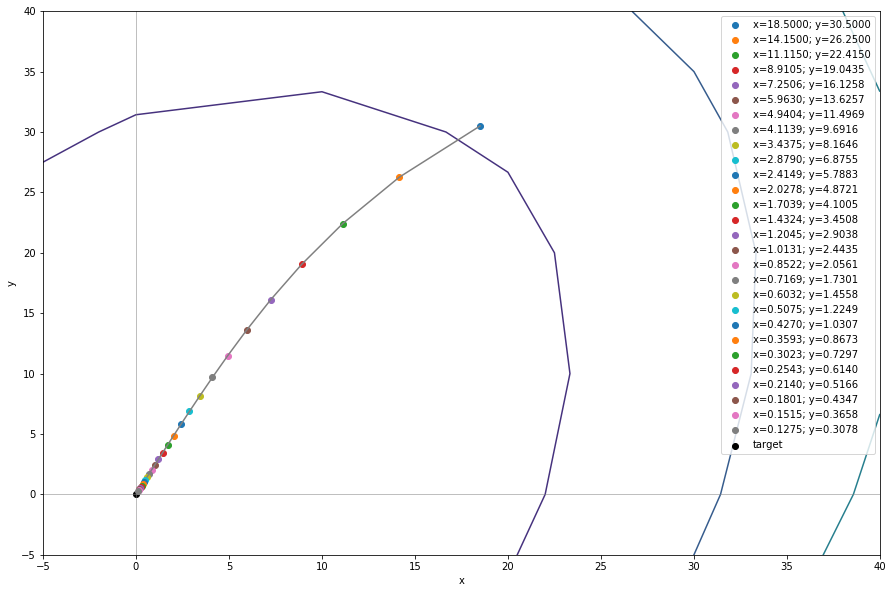

In [246]:
fig = plt.figure(figsize=(15,10))

ax = fig.gca()

ax.axvline(linewidth=0.5, color='grey')
ax.axhline(linewidth=0.5, color='grey')

ax.contour(X, Y, Z)

for i in np.arange(1,len(gd2[2][1:30])):
    ax.plot(gd2[2][i],gd2[3][i], 'o', label='x=%.4f; y=%.4f' %(gd2[2][i],gd2[3][i]))
    
ax.plot(gd2[2][1:20],gd2[3][1:20], '-', color='grey')    

ax.scatter(gd2[0],gd2[1], color='black', label='target')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim(-5, 40)
ax.set_ylim(-5, 40)

plt.legend()